Q1: Are US police shooting fatalities lower in 2020 due to the COVID-19 pandemic?

- Chart 1: line chart: cumulative
- Chart 2: bar chart: monthly comparisons with previous years
- Chart 3: This year, reduction in movement / restriction vs. reduction in fatal shooting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../data/fatal-police-shootings-data.csv', parse_dates=['date'], )
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


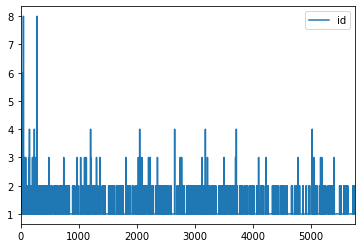

In [3]:
df.sort_values(by='id').id.diff().reset_index().drop('index', axis=1).plot()

In [4]:
df["weekday"] = df["date"].dt.weekday
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear

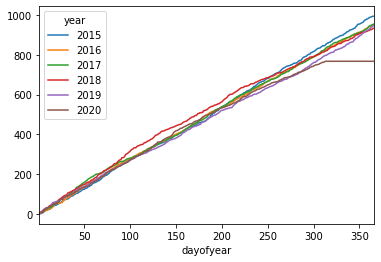

In [5]:
# chart 1
data = df.groupby(['year', 'dayofyear'])['name'].count() \
         .groupby(level=0).cumsum().reset_index()
data.columns = ['year', 'dayofyear', 'count']
data = data.pivot(index='dayofyear', columns='year', values='count').ffill()
data.plot()

pass

/Users/ChengchunGao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


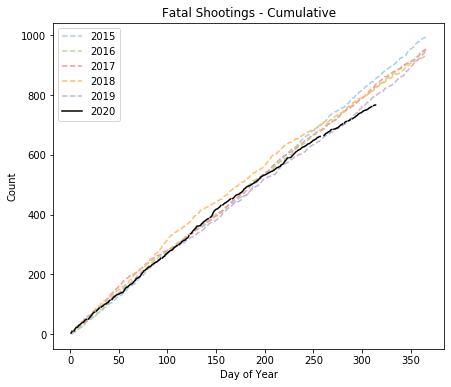

In [6]:
data = df.groupby(['year', 'dayofyear'])['name'].count() \
         .groupby(level=0).cumsum().reset_index()
data.columns = ['year', 'dayofyear', 'count']
data = data.pivot(index='dayofyear', columns='year', values='count')
data.loc[:,2015:2019].ffill(inplace=True)

fig, ax = plt.subplots(figsize=(7,6))

colormap = plt.cm.Paired
cmap = [colormap(i) for i in np.linspace(0, 0.9, 6)]

ax.plot(data.loc[:,2015], color = cmap[0], linestyle = '--', label = '2015')
ax.plot(data.loc[:,2016], color = cmap[1], linestyle = '--', label = '2016')
ax.plot(data.loc[:,2017], color = cmap[2], linestyle = '--', label = '2017')
ax.plot(data.loc[:,2018], color = cmap[3], linestyle = '--', label = '2018')
ax.plot(data.loc[:,2019], color = cmap[4], linestyle = '--', label = '2019')
ax.plot(data.loc[:,2020], color = 'black', label = '2020')

ax.set_title('Fatal Shootings - Cumulative')
ax.set_ylabel('Count')
ax.set_xlabel('Day of Year')
ax.legend()
#ax.legend(bbox_to_anchor = (1.01, .5), loc='center left')
#plt.xlim(2.95, 10.05)

ax
pass

/Users/ChengchunGao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,weekday,month,year,dayofyear
5358,5843,Tony McDade,2020-05-27,shot,gun,38.0,M,B,Tallahassee,FL,...,other,Not fleeing,False,-84.299,30.415,True,2,5,2020,148
5359,5847,Joshua Blessed,2020-05-27,shot,vehicle and gun,58.0,M,W,Geneseo,NY,...,attack,Car,False,-77.817,42.794,True,2,5,2020,148
5360,5856,Rommel Mendoza,2020-05-27,shot,sword,50.0,M,H,Los Angeles,CA,...,attack,NaN,False,-118.377,34.187,True,2,5,2020,148
5361,5858,Hector Hernandez,2020-05-27,shot,knife,31.0,M,H,Fullerton,CA,...,attack,Not fleeing,True,-117.975,33.865,True,2,5,2020,148
5362,5859,Alexander Scott,2020-05-27,shot,knife,30.0,M,NaN,Wilburton,OK,...,attack,Not fleeing,False,-95.317,34.917,True,2,5,2020,148
5363,5868,NaN,2020-05-27,shot,undetermined,NaN,M,NaN,Luverne,AL,...,undetermined,Not fleeing,False,NaN,NaN,True,2,5,2020,148
5364,5846,Modesto Reyes,2020-05-27,shot and Tasered,gun,35.0,M,B,Jefferson Parish,LA,...,attack,Other,True,-90.064,29.906,True,2,5,2020,148


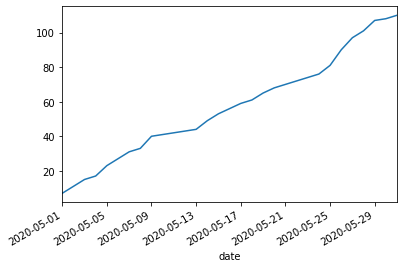

In [7]:
df[df.date>='2020-05-01'][df.date<='2020-05-31'].groupby('date').size().cumsum().plot()
df[df.date=='2020-05-27']

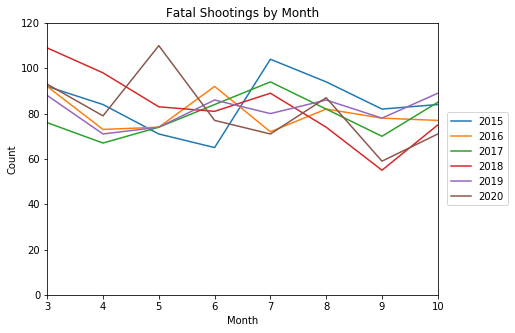

In [8]:
data = df.groupby(['year', 'month']).size().reset_index()
data.columns = ['year', 'month', 'count']
data = data.pivot(index='month', columns='year', values='count')

ax = data.loc[3:10,:].plot(figsize = (7,5), rot=0)
ax.set_title('Fatal Shootings by Month')
ax.set_ylabel('Count')
ax.set_xlabel('Month')
ax.legend(bbox_to_anchor = (1.01, .5), loc='center left')
plt.ylim(0, 120)

ax
pass

In [9]:
data = df.groupby(['year', 'month']).size().reset_index()
data.columns = ['year', 'month', 'count']
data = data.pivot(index='month', columns='year', values='count')


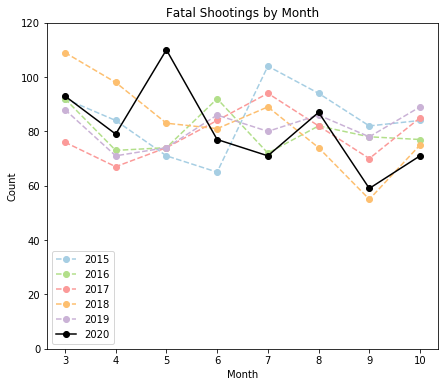

In [10]:
data = df.groupby(['year', 'month']).size().reset_index()
data.columns = ['year', 'month', 'count']
data = data.pivot(index='month', columns='year', values='count')

fig, ax = plt.subplots(figsize=(7,6))

colormap = plt.cm.Paired
cmap = [colormap(i) for i in np.linspace(0, 0.9, 6)]

ax.plot(data.loc[3:10,2015], color = cmap[0], linestyle = '--', marker='o', label = '2015')
ax.plot(data.loc[3:10,2016], color = cmap[1], linestyle = '--', marker='o', label = '2016')
ax.plot(data.loc[3:10,2017], color = cmap[2], linestyle = '--', marker='o', label = '2017')
ax.plot(data.loc[3:10,2018], color = cmap[3], linestyle = '--', marker='o', label = '2018')
ax.plot(data.loc[3:10,2019], color = cmap[4], linestyle = '--', marker='o', label = '2019')
ax.plot(data.loc[3:10,2020], color = 'black', marker='o', label = '2020')

ax.set_title('Fatal Shootings by Month')
ax.set_ylabel('Count')
ax.set_xlabel('Month')
ax.legend()
#ax.legend(bbox_to_anchor = (1.01, .5), loc='center left')
plt.ylim(0, 120)
#plt.xlim(2.95, 10.05)

ax
pass

    year  month  count
60  2020      1     88
61  2020      2     78
62  2020      3     93
63  2020      4     79
64  2020      5    110
65  2020      6     77
66  2020      7     71
67  2020      8     87
68  2020      9     59
69  2020     10     71
70  2020     11     21


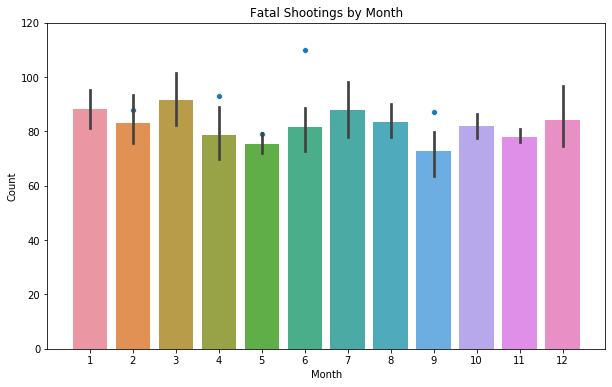

In [11]:
data = df.groupby(['year', 'month']).size().reset_index()
data.columns = ['year', 'month', 'count']

is_2020 = data['year']==2020
not_2020 = data['year']!=2020
print(data[is_2020])

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x='month', y='count', data = data[not_2020])
ax2 = sns.scatterplot(x='month', y='count', data=data[is_2020])
ax.set_title('Fatal Shootings by Month')
ax.set_ylabel('Count')
ax.set_xlabel('Month')
ax.set_ylim((0, 120))

pass

In [14]:
df_m_raw = pd.read_csv('/Users/ChengchunGao/Desktop/2020_US_Region_Mobility_Report.csv', parse_dates=['date'])
print(df_m_raw.shape)
df_m_raw.head(5)

(715006, 14)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


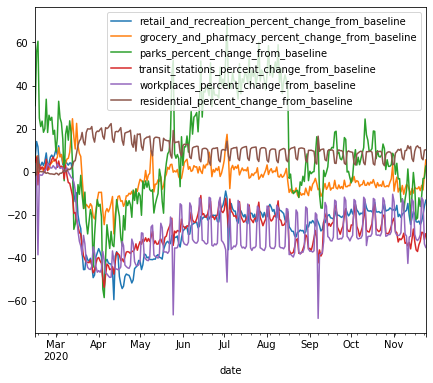

In [15]:
tmp = df_m_raw[df_m_raw.loc[:,'sub_region_1']=='California'].drop(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2', 'metro_area', 'iso_3166_2_code', 'census_fips_code'], axis=1)
tmp.groupby('date').mean().plot(figsize=(7,6))

In [16]:
# data cleaning
df_m = df_m_raw.drop(['parks_percent_change_from_baseline', 
           'residential_percent_change_from_baseline', 
           'grocery_and_pharmacy_percent_change_from_baseline'], axis=1)
df_m = df_m[df_m['date']>='2020-03-01']
#df_m = df_m[df_m['date']<='2020-05-24']
df_m = df_m[df_m['date']<='2020-10-31']

Text(0.5, 1.0, 'Change in Mobility - California')

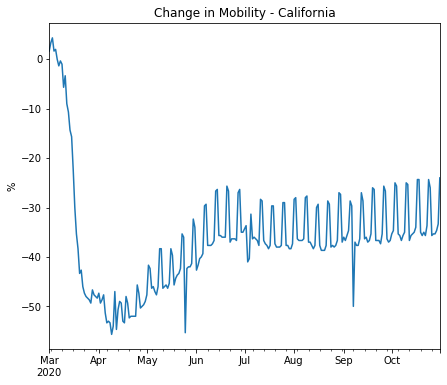

In [17]:

tmp=df_m.groupby(['iso_3166_2_code', 'date']).mean(). \
                drop(['metro_area', 'census_fips_code'], axis=1). \
                mean(axis=1)
fig, ax = plt.subplots(figsize=(7,6))
ax = tmp.loc['US-CA'].plot()
ax.set_xlabel('')
ax.set_ylabel('%')
ax.set_title('Change in Mobility - California')

In [18]:
df_mobil_change = df_m.groupby(['iso_3166_2_code']).mean(). \
                drop(['metro_area', 'census_fips_code'], axis=1). \
                mean(axis=1).reset_index()
df_mobil_change.columns = ['state', 'mobility_change']
df_mobil_change.replace({'state':'US-'}, {'state':''}, regex=True, inplace=True)

df_mobil_change.sort_values('mobility_change').tail()

,state,mobility_change
49,WV,-11.246748
13,ID,-8.851701
26,MT,-6.776651
41,SD,-3.634972
50,WY,-1.193019


In [19]:
mask_pre_2020 = np.logical_and(df.year<2020, np.logical_and(df.month>=3, df.month<=10))
mask_2020 = np.logical_and(df.year==2020, np.logical_and(df.month>=3, df.month<=10))
#mask_pre_2020 = np.logical_and(df.year<2020, np.logical_and(df.month>=3, df.date<='2020-05-24'))
#mask_2020 = np.logical_and(df.year==2020, np.logical_and(df.month>=3, df.date<='2020-05-24'))

df_2020 = pd.DataFrame({'count_2020': df[mask_2020].groupby('state').size()})
df_pre_2020 = pd.DataFrame({'count_pre_2020': df[mask_pre_2020].groupby('state').size()/5})
df_fatal_change = df_2020.join(df_pre_2020, how='outer').fillna(0)
df_fatal_change['fatality_change'] = (df_fatal_change.count_2020 / df_fatal_change.count_pre_2020 - 1)*100
df_fatal_change.head()

,count_2020,count_pre_2020,fatality_change
state,,,
AK,4.0,4.2,-4.761905
AL,8.0,11.2,-28.571429
AR,9.0,9.2,-2.173913
AZ,23.0,32.0,-28.125000
CA,103.0,99.6,3.413655


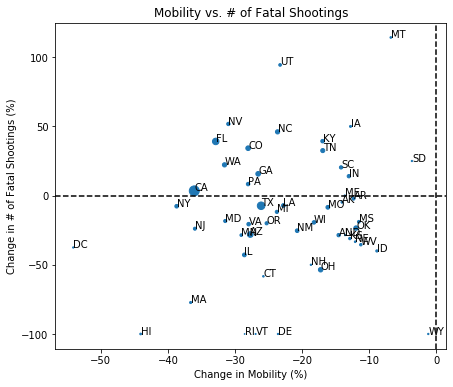

In [20]:
df_change = df_mobil_change.set_index('state').join(df_fatal_change, how='outer')

ax = df_change.plot(x='mobility_change', y='fatality_change', \
                    kind='scatter', s=df_change.count_pre_2020, figsize=(7,6))
#ax.grid()
ax.set_title('Mobility vs. # of Fatal Shootings')
ax.set_xlabel('Change in Mobility (%)')
ax.set_ylabel('Change in # of Fatal Shootings (%)')
ax.axhline(y=0, color='k', linestyle='--')
ax.axvline(x=0, color='k', linestyle='--')

txt_states = df_change.index.values
for i, txt in enumerate(txt_states):
    x = df_change.loc[txt, 'mobility_change']
    y = df_change.loc[txt, 'fatality_change']
    ax.annotate(txt, (x, y))

In [21]:
df_change.corr()

,mobility_change,count_2020,count_pre_2020,fatality_change
mobility_change,1.000000,-0.260748,-0.262792,0.162677
count_2020,-0.260748,1.000000,0.969413,0.358462
count_pre_2020,-0.262792,0.969413,1.000000,0.216420
fatality_change,0.162677,0.358462,0.216420,1.000000
